In [153]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
import numpy as np
import pylamp.utils.functions as fn
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear, Conv1D, MaxPool1D, Flatten
from pylamp.optim.optimizer import Optim
from pylamp.neural.activations import ReLU
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps
from pylamp.utils.plotter import Display

## Loading Data

In [155]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

In [156]:
X_train, X_test = fn.normalize_data(X_train, X_test)
y_train = fn.to_one_hot(y_train, 10)

In [157]:
model = Sequential()
model.add_module(Conv1D(kernel_size=3, in_channels=1, out_channels=32, strides=1))
model.add_module(MaxPool1D(kernel_size=2, strides=2))
model.add_module(Flatten())
model.add_module(Linear(4064,100))
model.add_module(ReLU())
model.add_module(Linear(100,10))

loss = CrossEntropyLoss()
optimizer_model = Optim(model, loss, 1e-3)
model_losses = SGD(optimizer_model, X_train, y_train, batch_size=32, epochs= , verbose=True, add_channel_x=True, add_channel_y=False)

Epoch 1/10, Average Loss: 0.3713394719719856
Epoch 2/10, Average Loss: 0.15789688124677018
Epoch 3/10, Average Loss: 0.1179504868140586
Epoch 4/10, Average Loss: 0.09199579548176481
Epoch 5/10, Average Loss: 0.0764288985530838
Epoch 6/10, Average Loss: 0.06440077351059074
Epoch 7/10, Average Loss: 0.05451481890178516
Epoch 8/10, Average Loss: 0.04618514918830696
Epoch 9/10, Average Loss: 0.041041220267888714
Epoch 10/10, Average Loss: 0.03505499550357533
Training finished.


Accuracy = 0.9362232187344295


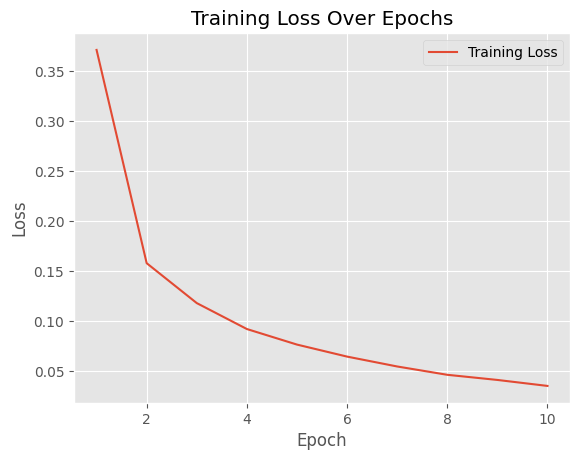

In [158]:
X_test = np.expand_dims(X_test, axis=-1)
fn.print_accuracy(model,X_test,y_test)
Display.plot_loss(model_losses)